# AirBnB data feature engineering

## Notebook set-up

Assume we are preparing this data for a linear regression model.

In [1]:
# PyPI imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import power_transform, StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.linear_model import LinearRegression

# Internal imports
import gperdrizet_functions as funcs

# _=np.seterr(invalid='ignore')

label='availability_365'

features=[
    'price',
    'minimum_nights',
    'number_of_reviews',
    'reviews_per_month',
    'calculated_host_listings_count'
]

## 1. Data loading

In [2]:
raw_data_df=pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv')
raw_data_df.head().transpose()

,0,1,2,3,4
id,2539,2595,3647,3831,5022
name,Clean & quiet apt home by the park,Skylit Midtown Castle,THE VILLAGE OF HARLEM....NEW YORK !,Cozy Entire Floor of Brownstone,Entire Apt: Spacious Studio/Loft by central park
host_id,2787,2845,4632,4869,7192
host_name,John,Jennifer,Elisabeth,LisaRoxanne,Laura
neighbourhood_group,Brooklyn,Manhattan,Manhattan,Brooklyn,Manhattan
neighbourhood,Kensington,Midtown,Harlem,Clinton Hill,East Harlem
latitude,40.64749,40.75362,40.80902,40.68514,40.79851
longitude,-73.97237,-73.98377,-73.9419,-73.95976,-73.94399
room_type,Private room,Entire home/apt,Private room,Entire home/apt,Entire home/apt
price,149,225,150,89,80


In [3]:
raw_data_df[features].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count
count,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000
mean,152.720687,7.029962,23.274466,1.373221,7.143982
std,240.154170,20.510550,44.550582,1.680442,32.952519
min,0.000000,1.000000,0.000000,0.010000,1.000000
25%,69.000000,1.000000,1.000000,0.190000,1.000000
50%,106.000000,3.000000,5.000000,0.720000,1.000000
75%,175.000000,5.000000,24.000000,2.020000,2.000000
max,10000.000000,1250.000000,629.000000,58.500000,327.000000


## 2. Box-Cox transformation

In [4]:
transformed_data_df=raw_data_df.copy()
transformed_data_df[features]=power_transform(transformed_data_df[features]+1, method='box-cox')

## 3. Standard scaling

In [5]:
scaled_transformed_data_df=transformed_data_df.copy()
scaler=StandardScaler()
scaled_transformed_data_df[features]=scaler.fit_transform(scaled_transformed_data_df[features])

## 5. Tree model performance test

In [6]:
cross_validation_folds=30

raw_features_scores=cross_val_score(
    HistGradientBoostingRegressor(),
    raw_data_df[features],
    raw_data_df[label],
    scoring='neg_root_mean_squared_error',
    cv=cross_validation_folds
)

transformed_features_scores=cross_val_score(
    HistGradientBoostingRegressor(),
    transformed_data_df[features],
    transformed_data_df[label],
    scoring='neg_root_mean_squared_error',
    cv=cross_validation_folds
)

scaled_transformed_features_scores=cross_val_score(
    HistGradientBoostingRegressor(),
    scaled_transformed_data_df[features],
    scaled_transformed_data_df[label],
    scoring='neg_root_mean_squared_error',
    cv=cross_validation_folds
)

tree_results={
    'Feature set': ['Raw']*cross_validation_folds + ['Scaled']*cross_validation_folds + ['Transformed']*cross_validation_folds,
    'Root mean squared error': list(abs(raw_features_scores)) + list(abs(transformed_features_scores)) + list(abs(scaled_transformed_features_scores))
}

tree_results_df=pd.DataFrame.from_dict(tree_results)
tree_results_df.head()

,Feature set,Root mean squared error
0,Raw,131.359598
1,Raw,132.956306
2,Raw,112.023087
3,Raw,112.733010
4,Raw,107.197648


## 5. Linear model performance test

In [7]:
raw_data_df.dropna(inplace=True)
transformed_data_df.dropna(inplace=True)
scaled_transformed_data_df.dropna(inplace=True)

raw_features_scores=cross_val_score(
    LinearRegression(),
    raw_data_df[features],
    raw_data_df[label],
    scoring='neg_root_mean_squared_error',
    cv=cross_validation_folds
)

scaled_features_scores=cross_val_score(
    LinearRegression(),
    transformed_data_df[features],
    transformed_data_df[label],
    scoring='neg_root_mean_squared_error',
    cv=cross_validation_folds
)

scaled_transformed_features_scores=cross_val_score(
    LinearRegression(),
    scaled_transformed_data_df[features],
    scaled_transformed_data_df[label],
    scoring='neg_root_mean_squared_error',
    cv=cross_validation_folds
)

linear_results={
    'Feature set': ['Raw']*cross_validation_folds + ['Scaled']*cross_validation_folds + ['Transformed']*cross_validation_folds,
    'Root mean squared error': list(abs(raw_features_scores)) + list(abs(scaled_transformed_features_scores)) + list(abs(scaled_transformed_features_scores))
}

linear_results_df=pd.DataFrame.from_dict(linear_results)
linear_results_df.head()

,Feature set,Root mean squared error
0,Raw,136.872669
1,Raw,140.778463
2,Raw,130.287894
3,Raw,128.573134
4,Raw,134.351765


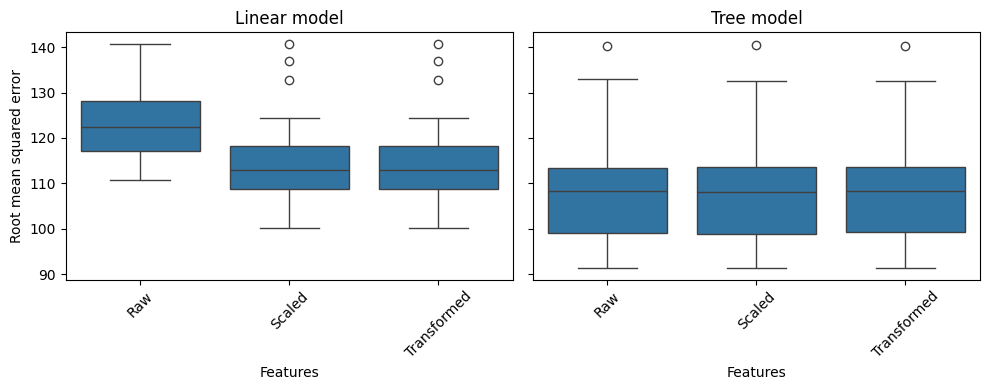

In [8]:
fig, axs=plt.subplots(1,2, figsize=(10,4), sharey=True)
axs=axs.flatten()

sns.boxplot(linear_results_df, x='Feature set', y='Root mean squared error', ax=axs[0])
sns.boxplot(tree_results_df, x='Feature set', y='Root mean squared error', ax=axs[1])
axs[0].set_title('Linear model')
axs[1].set_title('Tree model')
axs[0].set_xlabel('Features')
axs[1].set_xlabel('Features')
axs[1].set_title('Tree model')
axs[0].tick_params(axis='x', labelrotation=45)
axs[1].tick_params(axis='x', labelrotation=45)

plt.tight_layout()
plt.show()